In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, ConfusionMatrixDisplay
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

Loading DataSet

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Health_Care_data_for_ai_trial.xlsx')
df.columns

Index(['MRN', 'case 1 ', 'age', 'gender', 'BMI', 'DOA', 'DM', 'Htn', 'CAD',
       'prior lung', 'COPD', 'immune sup', 'smokers', 'alcohol', 'O2 on adm',
       'NRB mask', 'high flow', 'bipap', 'mech vent', 'pressers', 'dialysis',
       'Steroids', 'Tociluzimab', 'sedatives', 'rcotics', 'paralytics',
       'ferritin', 'crp', 'infilt', 'PM subcut', 'pneumothorax ',
       'sub cut emphy', 'PM+PTX bo', 'day no of PM/PTX', 'mode Vent', 'plat p',
       'Resp rate', 'tidal volume', 'PEEP', 'recruit', 'no days O2',
       'days on HF O2', 'no BIPAP', 'days vent', 'Trach day', 'LOSICU', 'LOSH',
       'died', 'APACHE', 'sofa score'],
      dtype='object')

Selecting the Variables and Target Colums

In [ ]:
df = df[['age', 'gender', 'BMI', 'prior lung', 'smokers', 'day no of PM/PTX', 'LOSICU', 'LOSH', 'died']]

In [ ]:
df

,age,gender,BMI,prior lung,smokers,day no of PM/PTX,LOSICU,LOSH,died
0,57,1.0,24.30,0.0,0,12.0,19.0,30.0,1.0
1,38,1.0,25.16,0.0,0,34.0,57.0,57.0,0.0
2,47,1.0,30.80,0.0,0,4.0,21.0,26.0,0.0
3,24,1.0,23.40,0.0,0,28.0,166.0,296.0,0.0
4,55,1.0,31.20,0.0,0,27.0,23.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...
371,61,1.0,29.70,0.0,0,0.0,1.0,2.0,0.0
372,41,1.0,34.00,0.0,NaN,0.0,27.0,34.0,1.0
373,77,0.0,33.30,0.0,0,0.0,24.0,29.0,0.0
374,53,1.0,32.00,0.0,NaN,0.0,15.0,16.0,1.0


In [ ]:
df.dtypes

age                   int64
gender              float64
BMI                 float64
prior lung          float64
smokers              object
day no of PM/PTX    float64
LOSICU              float64
LOSH                float64
died                float64
dtype: object

Checking Null Values in Dataset

In [ ]:
df.isna().sum()

age                  0
gender               1
BMI                 23
prior lung           2
smokers             47
day no of PM/PTX     3
LOSICU               2
LOSH                 5
died                 4
dtype: int64

In [ ]:
df['smokers'].unique()
df['smokers'].value_counts()

0    219
0     88
1     19
1      2
U      1
Name: smokers, dtype: int64

Changing String values in to Int

In [ ]:
df['smokers'] = df['smokers'].replace('0', 0)
df['smokers'] = df['smokers'].replace('1', 0)
df['smokers'] = df['smokers'].replace('U', 0)

In [ ]:
df.gender.value_counts()

1.0    289
0.0     86
Name: gender, dtype: int64

In [ ]:
df.loc[:, ('Age_Category')]=pd.cut(df.loc[:, ('age')],bins=[0, 18, 25, 35, 46, 65, 100], labels=['0-18', '19-25', '26-35', '36-46','47-65', '66+'])


In [ ]:
df['Age_Category'].value_counts()

47-65    169
36-46     97
66+       70
26-35     35
19-25      5
0-18       0
Name: Age_Category, dtype: int64

In [ ]:
df[['Age_Category','gender', 'age']].groupby(by=['Age_Category', 'gender']).count()

age
Age_Category gender     
0-18         0.0       0
             1.0       0
19-25        0.0       1
             1.0       4
26-35        0.0      10
             1.0      25
36-46        0.0      21
             1.0      76
47-65        0.0      34
             1.0     134
66+          0.0      20
             1.0      50

In [ ]:
df['gender'].fillna(1.0, inplace=True)

In [ ]:
df[['Age_Category','gender', 'BMI']].groupby(by=['Age_Category', 'gender']).mean()

BMI
Age_Category gender           
0-18         0.0           NaN
             1.0           NaN
19-25        0.0     39.060000
             1.0     26.470000
26-35        0.0     28.951000
             1.0     29.812727
36-46        0.0     32.346190
             1.0     28.918571
47-65        0.0     34.109375
             1.0     30.311890
66+          0.0     30.617368
             1.0     30.008542

In [ ]:
tmp=df[(df['Age_Category'] == '19-25') & (df['gender'] == 0.0)].BMI.fillna(39.06)
df.update(tmp)
tmp=df[(df['Age_Category'] == '19-25') & (df['gender'] == 1.0)].BMI.fillna(26.47)
df.update(tmp)
tmp=df[(df['Age_Category'] == '26-35') & (df['gender'] == 0.0)].BMI.fillna(28.95)
df.update(tmp)
tmp=df[(df['Age_Category'] == '26-35') & (df['gender'] == 1.0)].BMI.fillna(29.81)
df.update(tmp)
tmp=df[(df['Age_Category'] == '36-46') & (df['gender'] == 0.0)].BMI.fillna(32.34)
df.update(tmp)
tmp=df[(df['Age_Category'] == '36-46') & (df['gender'] == 1.0)].BMI.fillna(28.91)
df.update(tmp)
tmp=df[(df['Age_Category'] == '47-65') & (df['gender'] == 0.0)].BMI.fillna(34.11)
df.update(tmp)
tmp=df[(df['Age_Category'] == '47-65') & (df['gender'] == 1.0)].BMI.fillna(30.31)
df.update(tmp)
tmp=df[(df['Age_Category'] == '66+') & (df['gender'] == 0.0)].BMI.fillna(30.61)
df.update(tmp)
tmp=df[(df['Age_Category'] == '66+') & (df['gender'] == 1.0)].BMI.fillna(30.00)
df.update(tmp)

In [ ]:
df.isna().sum()

age                  0
gender               0
BMI                  0
prior lung           2
smokers             47
day no of PM/PTX     3
LOSICU               2
LOSH                 5
died                 4
Age_Category         0
dtype: int64

In [ ]:
df[df['prior lung'].isna()]

,age,gender,BMI,prior lung,smokers,day no of PM/PTX,LOSICU,LOSH,died,Age_Category
53,34,1.0,25.3,NaN,0.0,20.0,41.0,43.0,0.0,26-35
196,66,0.0,47.7,NaN,NaN,NaN,9.0,36.0,1.0,66+


In [ ]:
print(df[['smokers', 'prior lung']].groupby(by=['smokers']).count())

         prior lung
smokers            
0.0             309
1.0              19


In [ ]:
df['prior lung'][53]=1
df=df.dropna(subset=['prior lung'])

<ipython-input-19-cf0b27909527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prior lung'][53]=1


In [ ]:
print(df[['Age_Category', 'smokers']].groupby(by=['Age_Category']).count())
print(df[['gender', 'smokers']].groupby(by=['gender']).count())
print(df[['prior lung', 'smokers']].groupby(by=['prior lung']).count())

              smokers
Age_Category         
0-18                0
19-25               5
26-35              32
36-46              86
47-65             140
66+                66
        smokers
gender         
0.0          74
1.0         255
            smokers
prior lung         
0.0             316
1.0              13


In [ ]:
tmp=df[df['Age_Category'] == '36-46'].smokers.fillna(1)
df.update(tmp)
tmp=df[df['Age_Category'] == '47-65'].smokers.fillna(1)
df.update(tmp)
tmp=df[df['Age_Category'] == '66+'].smokers.fillna(1)
df.update(tmp)
tmp=df[df['gender'] == 1].smokers.fillna(1)
df.update(tmp)
tmp=df[df['prior lung'] == 0.0].smokers.fillna(1)
df.update(tmp)

<ipython-input-21-17701bff8f68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(tmp)
<ipython-input-21-17701bff8f68>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(tmp)
<ipython-input-21-17701bff8f68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [ ]:
print(df.shape)
print(df.dropna().shape)

(375, 10)
(362, 10)


In [ ]:
df[df['died'].isna()]

,age,gender,BMI,prior lung,smokers,day no of PM/PTX,LOSICU,LOSH,died,Age_Category
120,61,0.0,29.37,0.0,0.0,24.0,5.0,24.0,NaN,47-65
121,46,1.0,42.56,0.0,0.0,6.0,11.0,15.0,NaN,36-46
312,36,0.0,30.85,0.0,1.0,0.0,3.0,6.0,NaN,36-46
366,42,1.0,24.80,0.0,0.0,0.0,34.0,52.0,NaN,36-46


In [ ]:
predict_y=df[df['died'].isna()].drop(columns=['died', 'Age_Category'])

In [ ]:
df = df.dropna()
print(df.shape)

(362, 10)


<Axes: >

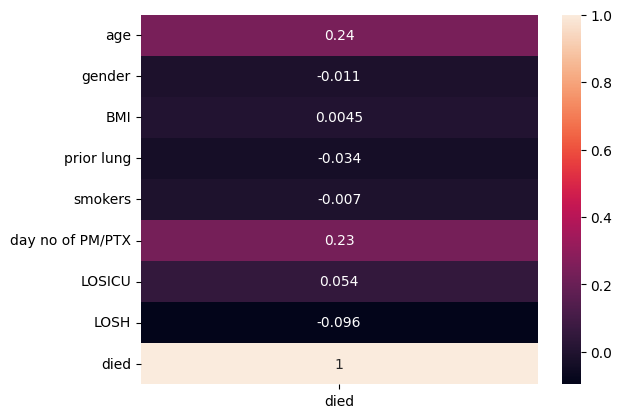

In [ ]:
sns.heatmap(df.drop(columns=['Age_Category']).corr()[['died']], annot=True)

<ipython-input-27-2ee2caf95654>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrplot = df.corr().unstack()[['died']]


<Axes: >

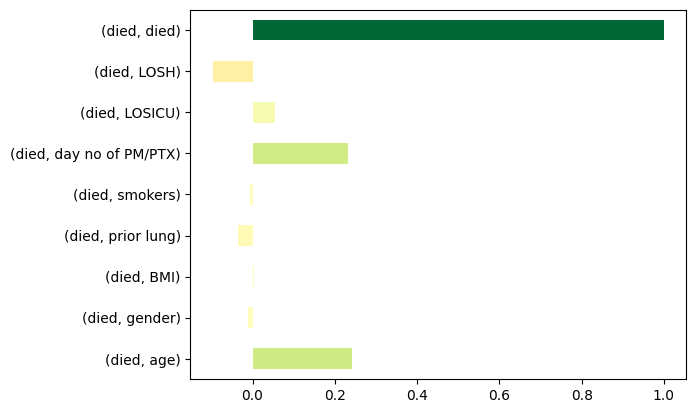

In [ ]:
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
corrplot = df.corr().unstack()[['died']]
colors = [plt.cm.RdYlGn(norm(c)) for c in corrplot.values]
corrplot.plot.barh(color=colors)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['died', 'Age_Category']), df['died'], test_size=0.15, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean absolute error: {mse}")
print(f"R-squared score: {r2}")

Mean absolute error: 0.4219909844914668
R-squared score: 0.047950561549189086


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(max_iter=200)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

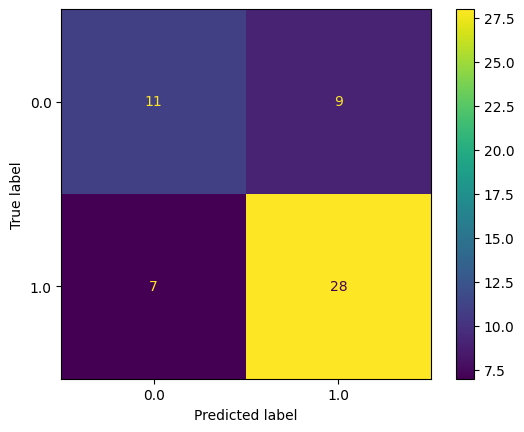

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


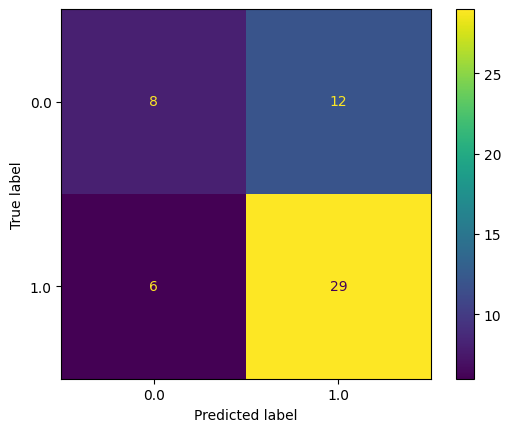

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


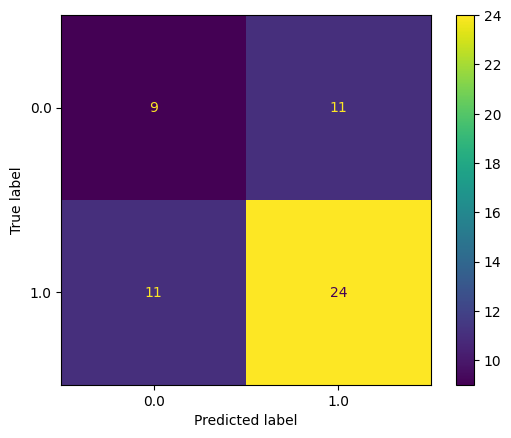

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model=XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred=model.predict(X_test)

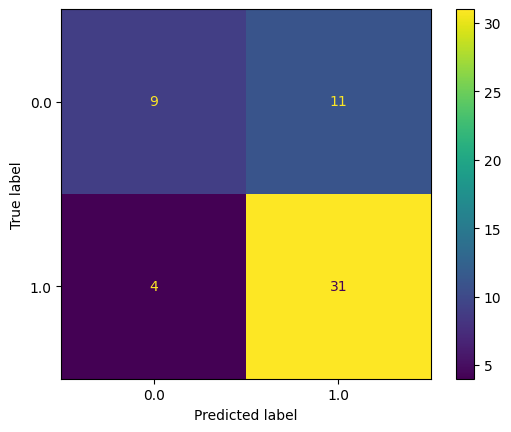

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)

SVC()

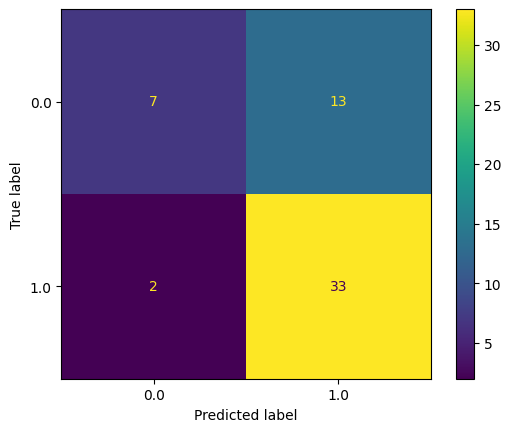

In [ ]:
y_pred=svc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svc,param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

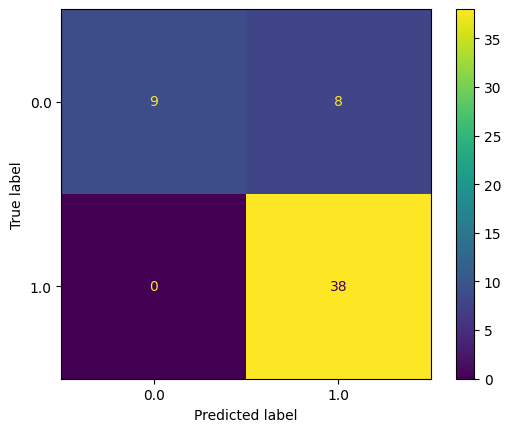

In [ ]:
grid_svc = grid.predict(X_test)
ConfusionMatrixDisplay.from_predictions(grid_svc, y_pred)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
predicted_y = grid.predict(predict_y)
df_result = predict_y
df_result['died'] = predicted_y
print(df_result)

     age  gender    BMI  prior lung  smokers  day no of PM/PTX  LOSICU  LOSH  \
120   61     0.0  29.37         0.0      0.0              24.0     5.0  24.0   
121   46     1.0  42.56         0.0      0.0               6.0    11.0  15.0   
312   36     0.0  30.85         0.0      1.0               0.0     3.0   6.0   
366   42     1.0  24.80         0.0      0.0               0.0    34.0  52.0   

     died  
120   1.0  
121   1.0  
312   1.0  
366   0.0  


In [ ]:
import joblib
joblib.dump(grid, '/content/drive/MyDrive/svc-model.sav')

['/content/drive/MyDrive/svc-model.sav']